<h2>Introduction</h2>
<p><strong>The Casual Organisation for Public Safety(COPS)</strong> is the name of the team, consisting of Luke Williams, Alexander Chlpka and Zi Han Ding. We decided that the best neighborhood should be determined by its safety and available facilities. The way we determined each of our metrics is through the WPRDC and by having a theme at the start. We looked for each of our metrics based on the idea of public safety. We have looked for alternatives, for example, at the start of our project, we explored data that are related to public health as well. The final metric was decided after we combined all of our graphs and data together.</p>

In [2]:
import pandas as pd #importing pandas
import matplotlib.pyplot as plt #importing matplotlib
import numpy as np #importing numpy
%matplotlib inline

<h2>Importing all the data</h2>
<p>Importing all the data by using the links from the official site</p>

In [3]:
polInc = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b") #Importing data of police incidents in the last 30 days
polInc.drop(["PK", "INCIDENTZONE", "CCR"], axis = 1) #dropping the columns that is police specific such as incident ID
polIncDF = pd.DataFrame(polInc) #Making the dataframe
polIncDF = polIncDF.groupby("INCIDENTNEIGHBORHOOD").count()
polIncDF.drop(["Outside City", "Outside County"], inplace = True) #Dropping outside city and outside county

In [4]:
polIncDF2 = pd.DataFrame(polInc) #Making the second dataframe for another standard
polIncDF2 = polIncDF2.groupby("INCIDENTNEIGHBORHOOD")["HIERARCHY"].max() #Finding out the most sever crime based on UCR Hierarchy, but this converts the dataframe to a series
polIncDF2 = pd.DataFrame(polIncDF2) #Turning the series back into a dataframe
polIncDF2.drop(["Outside City", "Outside County"], inplace = True) #Dropping outside city and outside county

In [5]:
polIncDFFin = pd.merge(polIncDF.sort_values(by = "OFFENSES"), polIncDF2.sort_values(by = "HIERARCHY"), on = ["INCIDENTNEIGHBORHOOD"]) #Merge
polIncDFFin.drop(polIncDFFin.columns.difference(["HIERARCHY_y", "INCIDENTNEIGHBORHOOD", "OFFENSES"]), 1, inplace = True) #Removing all columns except the ones we want
polIncDFFin.rename(columns = {"INCIDENTNEIGHBORHOOD":"Neighborhoods", "HIERARCHY_y":"Hierarchy", "OFFENSES":"Number of Incidents"}, inplace = True) #Changeing column names for presentation

In [7]:
pf = pd.read_csv("https://data.wprdc.org/datastore/dump/fbb50b02-2879-47cd-abea-ae697ec05170")

In [8]:
publicFac = pd.DataFrame(pf) #Making the dataframe for public facilities
publicFac = publicFac.groupby("neighborhood").count()
publicFac.drop(publicFac.columns.difference(["inactive", "neighborhood"]), 1, inplace = True) #dropping irrelevant columns

<h2>Merging</h2>

In [9]:
preMerged = pd.merge(polIncDFFin, publicFac.sort_values(by = "inactive"), left_index = True, right_index = True) #Merging and telling pandas to merge by index
preMerged.head() #top five values

,Number of Incidents,Hierarchy,inactive
Regent Square,1,0,4
Swisshelm Park,2,99,1
Glen Hazel,3,99,1
Hays,4,99,2
Allegheny West,8,27,3


In [10]:
fire_DS = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")

In [12]:
fire_DF = pd.DataFrame(fire_DS) #fire alarm dataframe
fire_DF = fire_DF.groupby("neighborhood").count() 
fire_DF.drop(fire_DF.columns.difference(["neighborhood", "alarms"]), 1, inplace = True) #dropping irrelevant columns again
fire_DF.head()

,alarms
neighborhood,
Allegheny Center,50
Allegheny West,34
Allentown,99
Arlington,40
Arlington Heights,12


In [11]:
finalMerged = pd.merge(preMerged, fire_DF, left_index = True, right_index = True) #final merge
finalMerged = pd.DataFrame(finalMerged)

<h2>Initial graph of raw data</h2>
<p>This is basically combining all of our data into one place.</p>

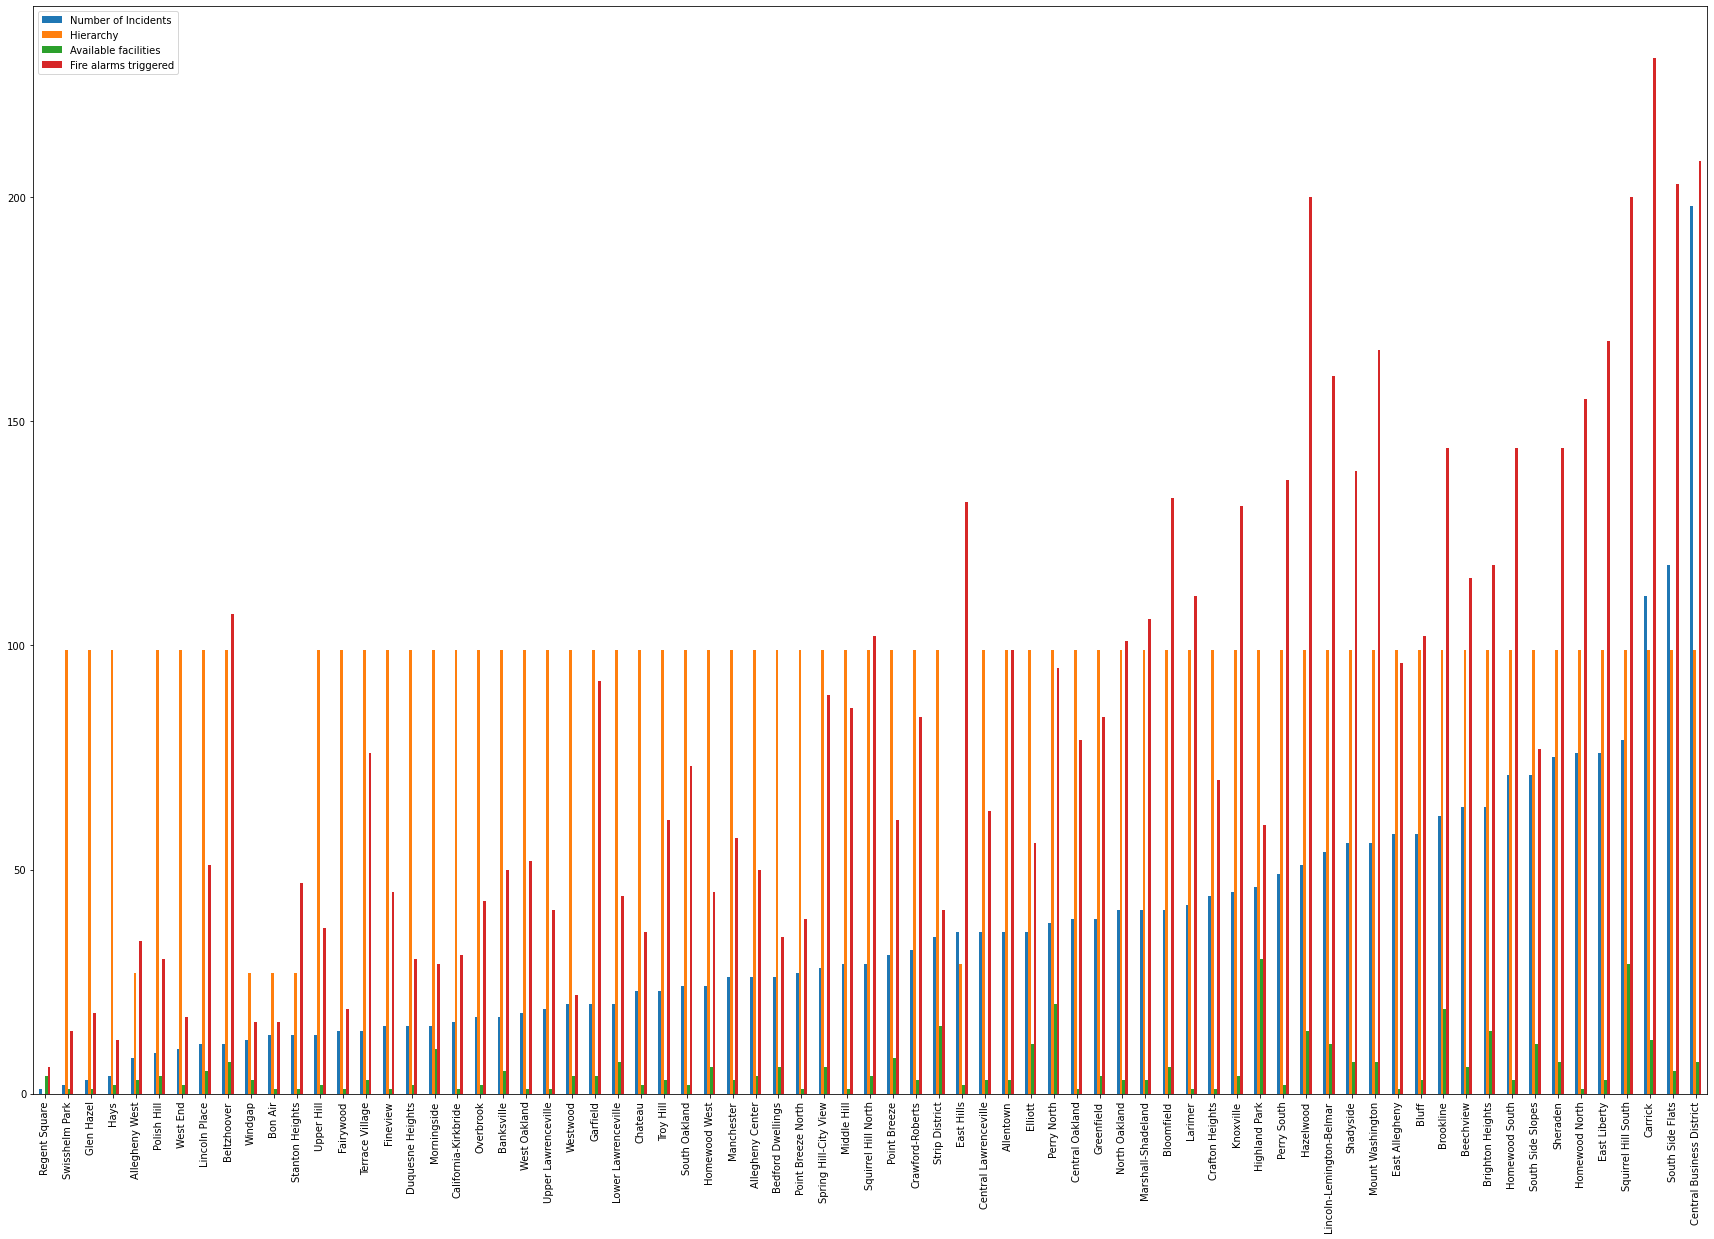

In [12]:
finalMerged.rename(columns = {"inactive":"Available facilities", "alarms":"Fire alarms triggered"}, inplace = True) #replacing names for presentation
finalMerged.sort_values(by = ["Number of Incidents", "Hierarchy", "Available facilities", "Fire alarms triggered"]).plot(kind = "bar", figsize = (30, 20)) #make sure all values are sorted


<h2>Raw Data Top Five</h2>

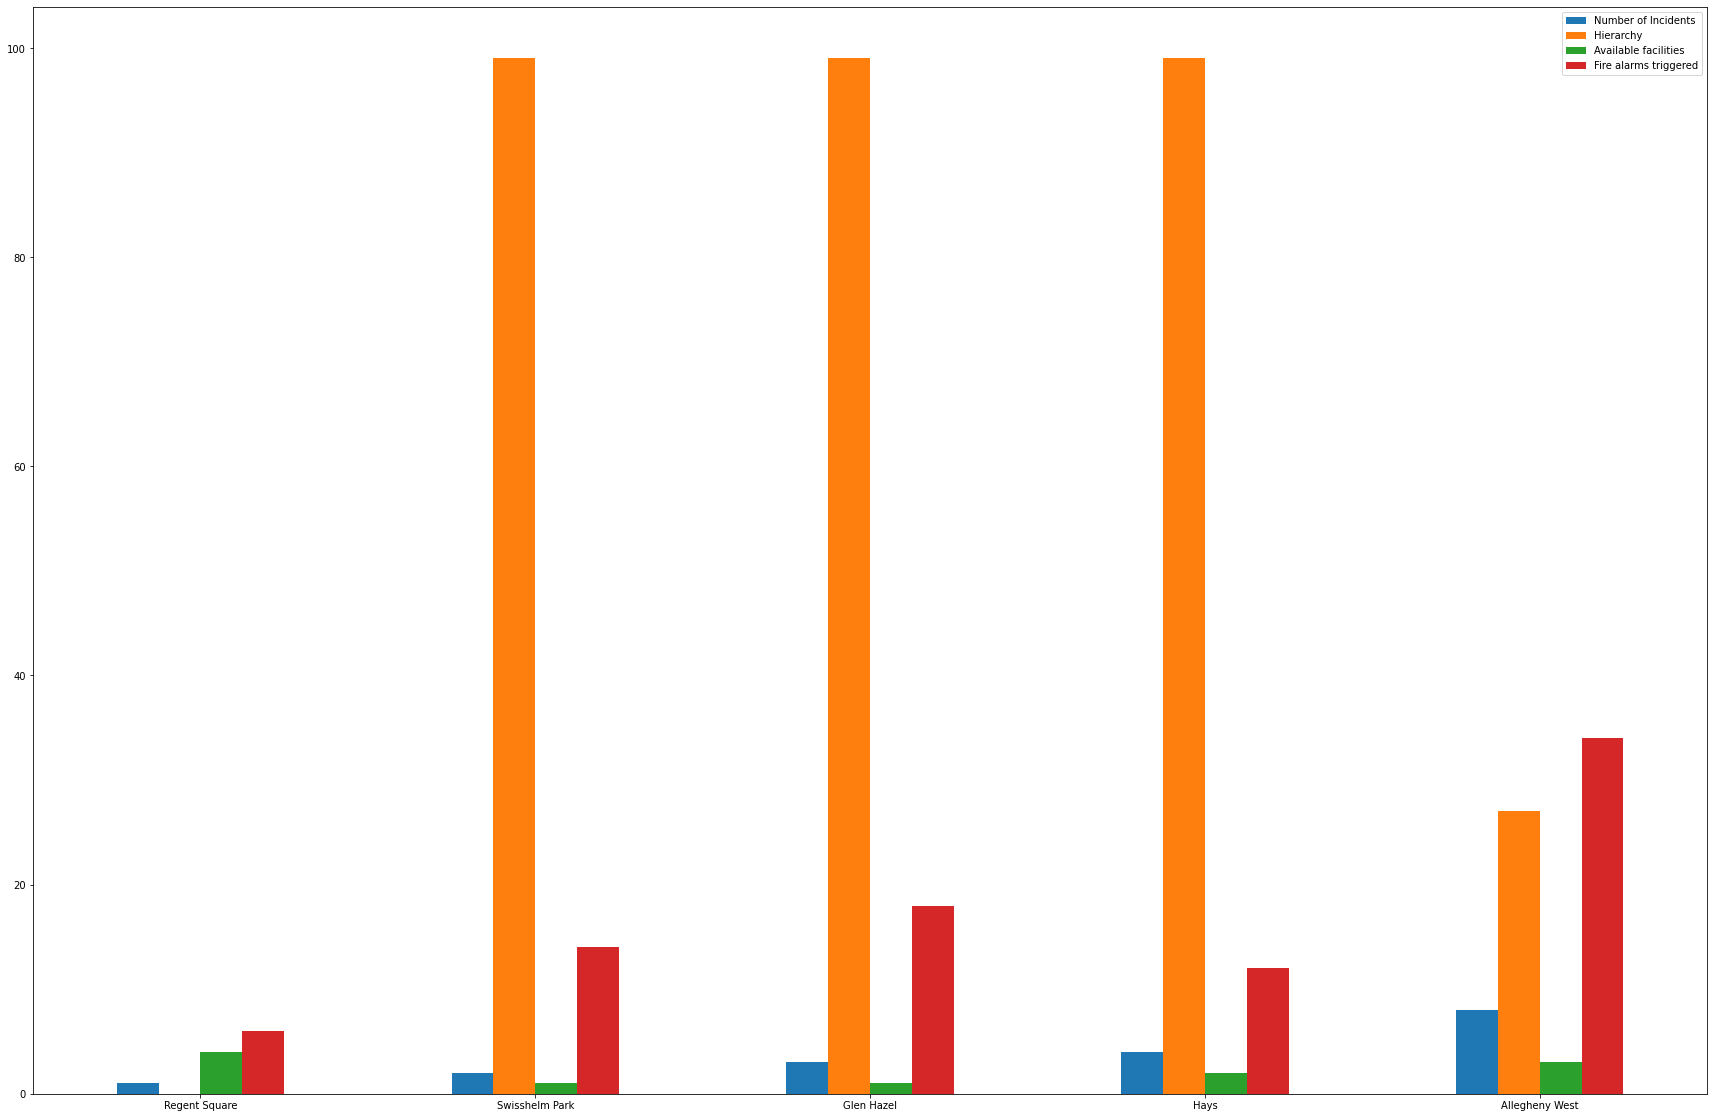

In [13]:
finalMerged.sort_values(by = ["Number of Incidents", "Hierarchy", "Available facilities", "Fire alarms triggered"]).head().plot(kind = "bar", figsize = (30, 20), rot = 0) #displaying top five
plt.style.use("seaborn") #adding style

In [14]:
print(fire_DF) ##Make sure that the alarms data is ready to combine

                     alarms
neighborhood               
Allegheny Center         50
Allegheny West           34
Allentown                99
Arlington                40
Arlington Heights        12
...                     ...
Upper Lawrenceville      41
West End                 17
West Oakland             52
Westwood                 22
Windgap                  16

[91 rows x 1 columns]


In [15]:
print(publicFac) ##Make sure that the public facilities are ready to combine

                     inactive
neighborhood                 
Allegheny Center            4
Allegheny West              3
Allentown                   3
Banksville                  5
Bedford Dwellings           6
...                       ...
Upper Lawrenceville         1
West End                    2
West Oakland                1
Westwood                    4
Windgap                     3

[75 rows x 1 columns]


In [19]:
print(preMerged["Number of Incidents"]) ##Make sure that the number of incidents is ready to combine

Regent Square                  1
Swisshelm Park                 2
Glen Hazel                     3
Hays                           4
Allegheny West                 8
                            ... 
Homewood North                76
Squirrel Hill South           79
Carrick                      111
South Side Flats             118
Central Business District    198
Name: Number of Incidents, Length: 73, dtype: int64


In [36]:
firesAndIncidents = fire_DF["alarms"] + preMerged["Number of Incidents"] ##Combine then print fires and incidents

In [37]:
normalized = firesAndIncidents.div(10) ##Divide by 10 to get a more normalized metric

In [103]:
finalMetric = publicFac["inactive"] - normalized ##Combine the normalized metric with the incidents to get our final metric
finalMetric = finalMetric.dropna() ##Drop values that came out to 'NaN'
finalMetric = finalMetric.sort_values(0, ascending = False, na_position='first') ##Sort the data in ascending order because the 'best' neighborhood in our metric is actually the 'least bad'
topTen = finalMetric.head(10) ##Create a top ten list to make graphing much cleaner

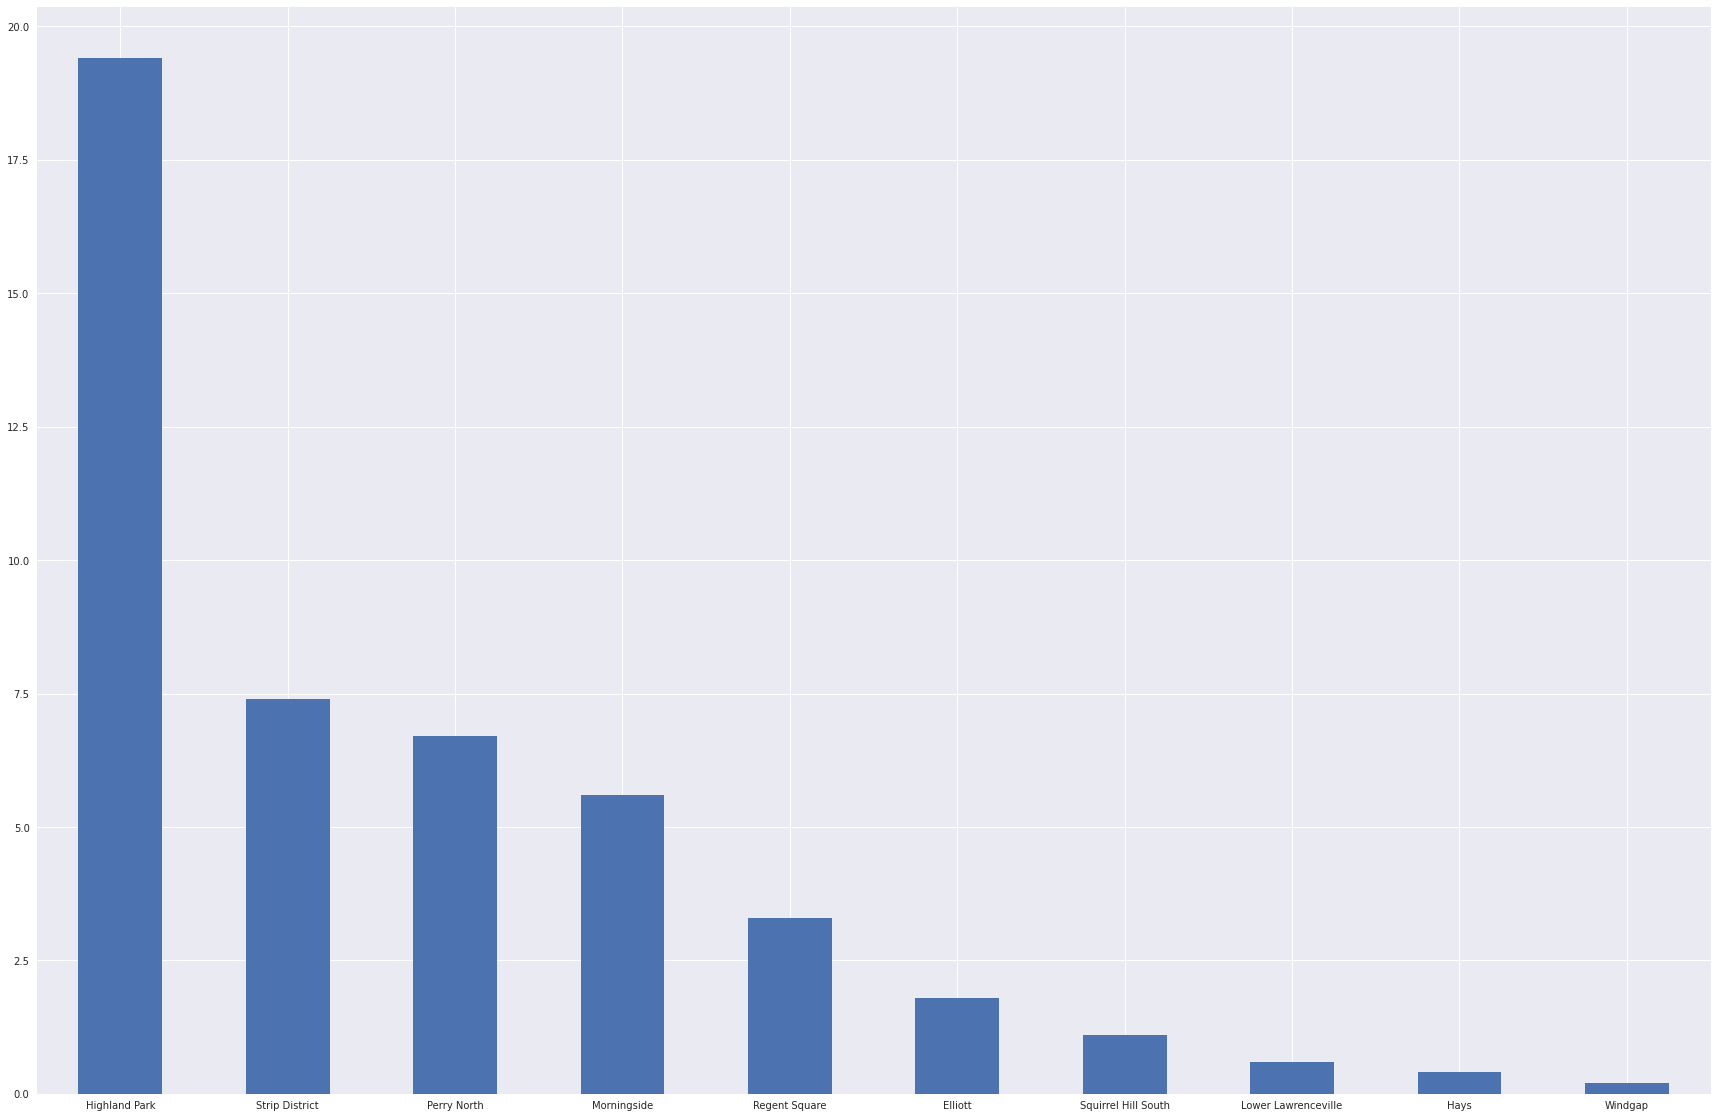

In [102]:
topTen.plot(kind = "bar", figsize = (30, 20), rot = 0) ##Plot the top ten neighborhoods as decided by our metric
##The overall metric formula is this: Number of available facilities - Number of fires and police incidents
##This is done because available facilities is a good thing, and fires+incidents is a 'bad' metric, so the winner is the one with the highest facility:fires+incidents ratio

# Luke's Conclusion
I think that the metrics our group used were accurant and relevant for determining the best neighborhood. Personally, I'm not confident in what my favorite neighborhood in Pittsburgh would be, since I've only been here for a few months and I've only been to a handful on the west side and downtown (North/South Squirrel Hill, North/South/Central Oakland, Shadyside, etc). If I had to choose a favorite out of the small number of neighborhoods I've visited, I would have to say Squirrel Hill South because of the great food, shops, and how easy it is to get around. Though it didn't affect how I determined my personal favorite neighborhood, Squirrel Hill South also has the 2nd highest amount of public facilities in the city, which was the metric that I used in my individual notebook. 